# Velocity

In [1]:
%load_ext autoreload
%autoreload 2
import json

import matplotlib.pyplot as plt
import numpy as np
from pydantic import Field
from pydantic.dataclasses import dataclass

from binaryStatistics.base_distribution import BaseDistribution
from binaryStatistics.distributions import Uniform, Thermal, PowerLaw
from binaryStatistics.plot_utils import plot_histogram

data_length = 100_000

$$
\tilde{v}\left( \phi, \phi_0, i, e \right) = \sqrt[4]{1 - \sin^2 i \cos^2 \left( \phi - \phi_0 \right)} \sqrt{\frac{1 + e^2 + 2e\cos\phi - \sin^2 i \left( e\sin\phi_0 - \sin \left( \phi - \phi_0 \right) \right)}{1 - e\cos\phi}}
$$

## Eccentricity $e$

Thermal distribution

$$
p(e) = 2e
$$

In [2]:
rand = np.random.uniform(0,1,size=data_length)
thermal = Thermal()
e = thermal.random_sample(0,1,size=data_length)
e = np.sqrt(rand)

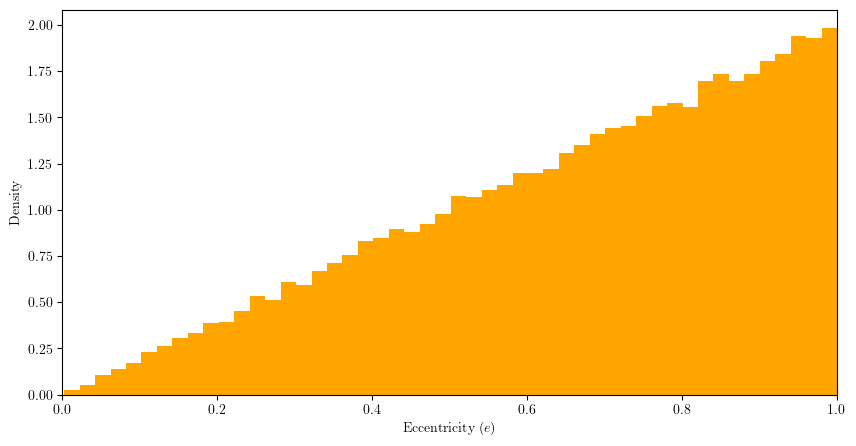

In [3]:
_ = plot_histogram(
    e,
    bins=50,
    density=True,
    color="#ffa500",
    x_params={
        "label": "Eccentricity ($e$)",
        "limits": (0,1),
    },
    file="distributions_files/eccentricity.png"
)

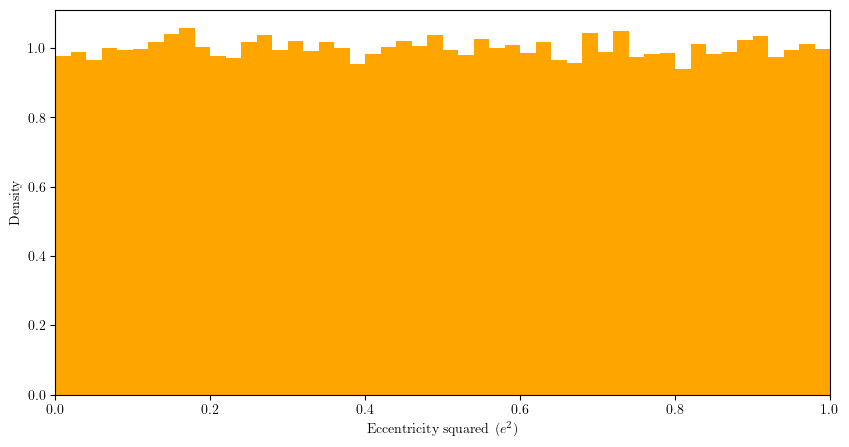

In [4]:
_ = plot_histogram(
    e**2,
    bins=50,
    density=True,
    color="#ffa500",
    x_params={
        "label": "Eccentricity squared ($e^2$)",
        "limits": (0,1),
    },
    file="distributions_files/eccentricity_squared.png"
)

## Orbit angle $i$

$$
p(i) = \sin(i)
$$

In [5]:
@dataclass
class Sine(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, i):
        return np.sin(i)

In [6]:
sine = Sine()
i = sine.random_sample(0,np.pi/2,size=data_length)
i = np.arccos(rand)

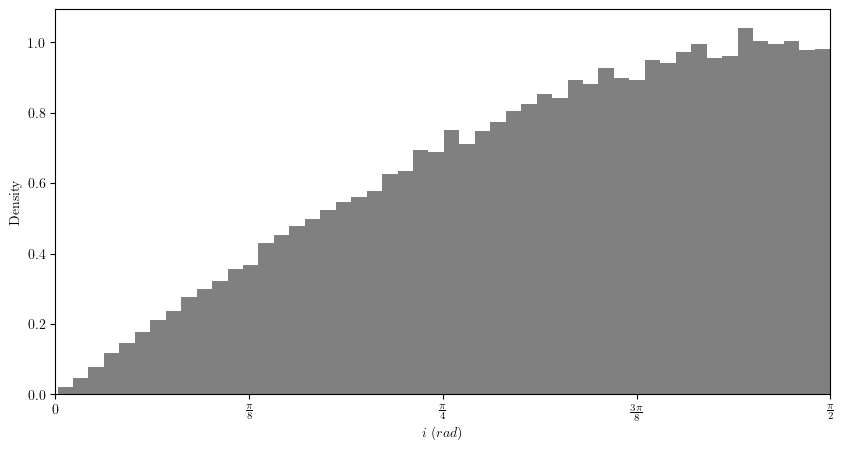

In [7]:
_ = plot_histogram(
    i,
    bins=50,
    density=True,
    color="gray",
    x_params={
        "label": "$i$ ($rad$)",
        "limits": (0, np.pi/2)
    },
    pi_factor=8,
    file="distributions_files/orbit_angle.png"
)

## Phase angle $\phi$

$$
p\left( \phi | e \right) = \frac{\left( 1 - e^2\right)^{3/2}}{2\pi \left( 1 + e \cos\phi \right)^2},
$$

In [8]:
@dataclass
class PhiAngle(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, phi, e):
        return ((1.0 - e**2.0)**(3.0/2.0))/(2*np.pi*(1 + e*np.cos(phi))**2)

In [11]:
phi_angle = PhiAngle(
    dist_parameters={
        "e": e,
    }
)
phi = phi_angle.random_sample(0.0,2*np.pi,size=data_length)

In [13]:
phi_2 = []
for i in range(len(phi)):
    LI = 0
    while LI < 1:
        ecc = np.sqrt(np.random.uniform())
        PhiT = np.random.uniform(0,1)*2*np.pi
        RnT = np.random.uniform(0,1)
        PPhi = np.random.uniform(0,1)/(1.0 - e[i])**2
        temp = (1 + e[i]*np.cos(PhiT))**2
        if PPhi < (1.0/temp):
            LI = 2;
            Phi=PhiT
            phi_2.append(Phi)

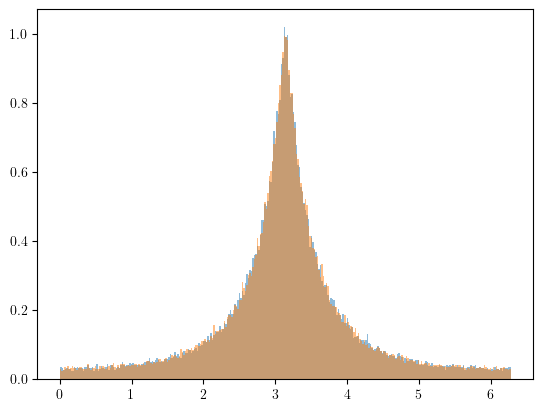

In [14]:
_=plt.hist(phi,bins=300, density=True, alpha=0.5)
_=plt.hist(phi_2,bins=300, density=True, alpha=0.5)

In [15]:
np.median(phi), np.median(phi_2)

(3.1439681931751036, 3.142955550280072)

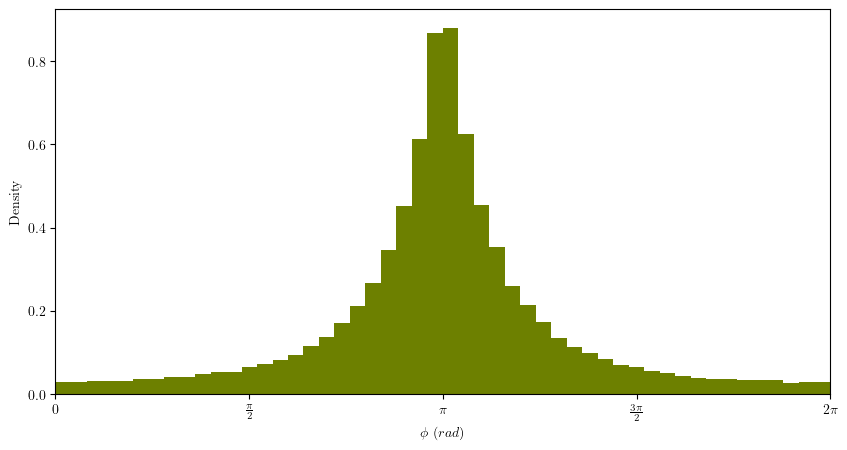

In [16]:
_ = plot_histogram(
    phi,
    bins=50,
    density=True,
    color="#6d8000",
    x_params={
        "label": "$\phi$ ($rad$)",
        "limits": (0,2*np.pi)
    },
    pi_factor=2,
    file="distributions_files/phase_angle.png"
)

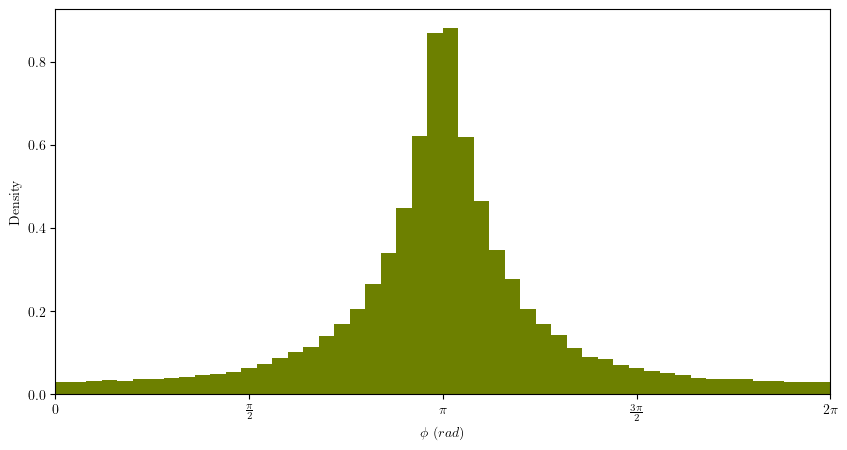

In [17]:
_ = plot_histogram(
    phi_2,
    bins=50,
    density=True,
    color="#6d8000",
    x_params={
        "label": "$\phi$ ($rad$)",
        "limits": (0,2*np.pi)
    },
    pi_factor=2,
    file="distributions_files/phase_angle.png"
)

## Initial phase angle $\phi_0$

$$
p \left(\phi_0\right) = \mathcal{U} \left\lbrace 0, 2\pi \right\rbrace
$$

In [18]:
uniform = Uniform()
phi_0 = uniform.random_sample(0,2*np.pi,size=data_length)
phi_0 = np.random.uniform(0,2*np.pi, size=data_length)

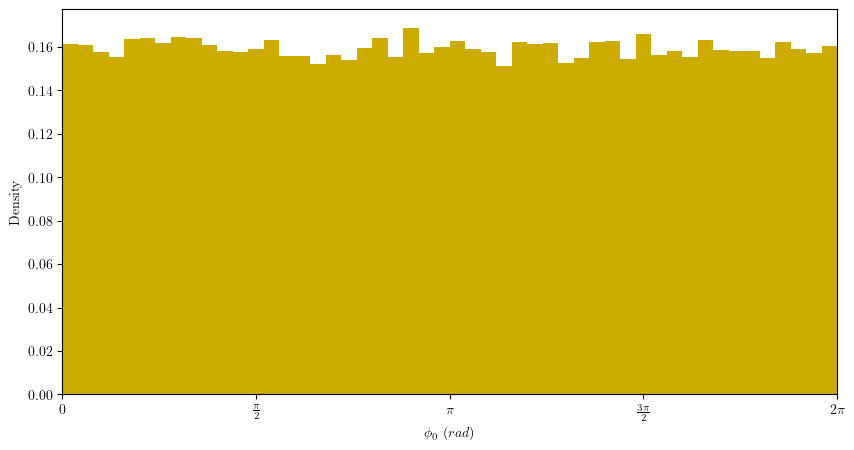

In [19]:
_ = plot_histogram(
    phi_0,
    bins=50,
    density=True,
    color="#ccac00",
    x_params={
        "label": "$\\phi_0$ ($rad$)",
        "limits": (0, 2*np.pi)
    },
    pi_factor=2,
    file="distributions_files/initial_phase_angle.png"
)

## Velocity $\tilde{v}$

In [20]:
@dataclass
class VelTilde(BaseDistribution):
    
    dist_parameters: dict = Field(default={})
    
    def __post_init_post_parse__(self):
        super().__init__(self.dist_parameters)
        
    def distribution(self, phi, phi_0, i, e):
        #term_1 = (1.0 + e**2 + 2*e*np.cos(phi))/(1 + e*np.cos(phi))
        #term_3 = 1.0 - (np.sin(i)**2)*(np.cos(alpha + phi - phi_0)**2)
        temp2 = 1.0 - (np.sin(i)**2)*(np.cos(phi - phi_0)**2)
        temp2 = temp2**0.25
        
        temp1 = e*np.sin(phi_0) - np.sin(phi-phi_0)
        temp1 = temp1*temp1
        
        temp3 = (1.0 + e*e + 2*e*np.cos(phi) - np.sin(i)*np.sin(i)*temp1)/(1.0 + e*np.cos(phi))
        temp3 = np.sqrt(temp3)
        
        return temp2*temp3

In [21]:
e = thermal.random_sample(0,1,size=data_length)
i = sine.random_sample(0,np.pi/2,size=data_length)
phi_0 = uniform.random_sample(0,2*np.pi,size=data_length)
phi_angle = PhiAngle(
    dist_parameters={
        "e":e
    }
)
phi = phi_angle.random_sample(0.0,2*np.pi,size=data_length)

In [23]:
phi_4 = []
for index in range(data_length):
    LI = 0
    while LI < 1:
        E = e[index]
        c = (1 - E**2)/(2*np.pi*(1 - E)**2)
        base = 2*np.pi
        Phi = np.random.uniform()*base
        pPhi = np.random.uniform()*c 
        if pPhi <= phi_angle.distribution(Phi,E):
            LI = 2
            phi_4.append(Phi)

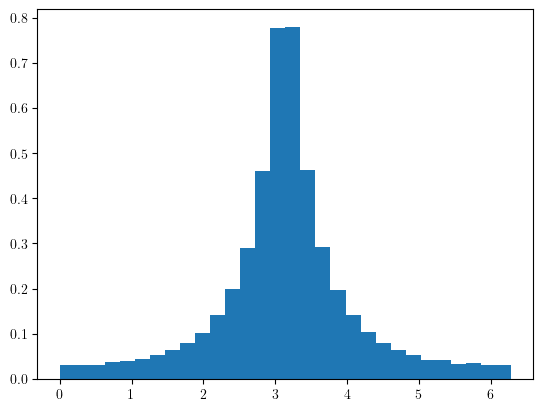

In [24]:
_=plt.hist(phi_4, bins=30, density=True)

In [25]:
# Rejection method
phi_2 = []
for index in range(len(phi)):
    LI = 0
    while LI < 1:
        PhiT = np.random.uniform(0,1)*2*np.pi
        RnT = np.random.uniform(0,1)
        PPhi = np.random.uniform(0,1)/(1.0 - e[index])**2
        temp = (1 + e[index]*np.cos(PhiT))**2
        if PPhi < (1.0/temp):
            LI = 2;
            Phi=PhiT
            phi_2.append(Phi)

In [26]:
vel = VelTilde()
v_tilde_1 = vel.distribution(
    phi_4, 
    phi_0,
    i,
    e
)
v_tilde_2 = vel.distribution(
    phi_2, 
    phi_0,
    i,
    e
)

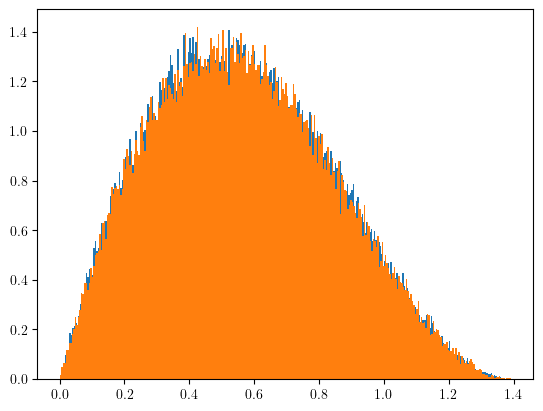

In [27]:
_=plt.hist(v_tilde_1, bins=300, density=True)
_=plt.hist(v_tilde_2, bins=300, density=True)

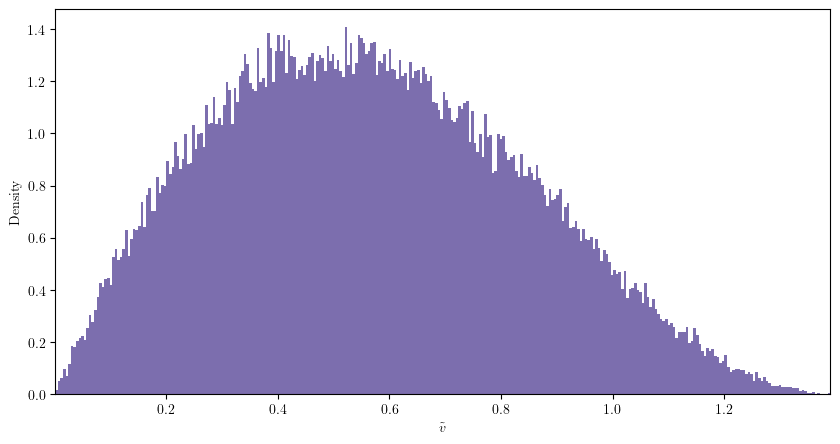

In [28]:
fig, ax = plot_histogram(
    v_tilde_1,
    bins=300,
    density=True,
    color="#7c6eae",
    x_params={
        "label":"$\\tilde{v}$",
    },
    file="distributions_files/v2d.png"
)

In [29]:
with open("../VTil.dat","r") as file:
    lines = file.readlines()
    
    v = []
    v_dist = []
    for line in lines:
        vel, dist = line.strip().split(" ")
        v.append(float(vel))
        v_dist.append(float(dist))

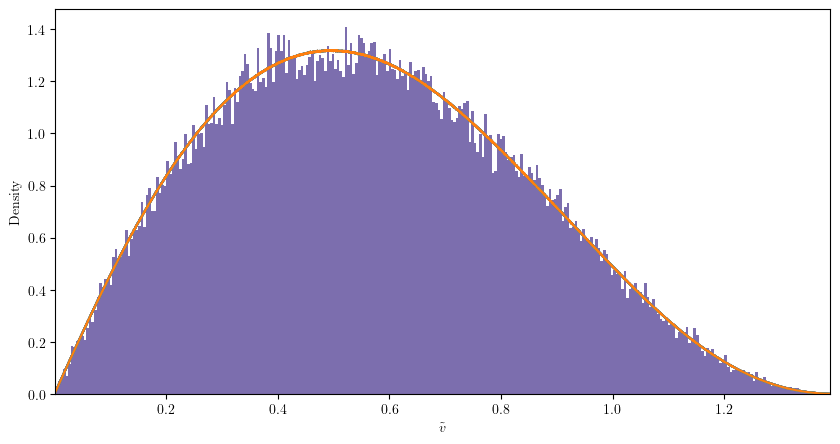

In [41]:
ax.plot(v, v_dist)
fig